# Post-process of MCCM algorithms

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


In [4]:
data = pd.read_csv("datas/Fe.csv",header=None)

In [5]:
data.head()

,0,1
0,0.319627,11.711952
1,0.807826,34.943728
2,1.614677,85.042731
3,4.082104,266.904484
4,8.163933,718.755578


In [6]:
data.shape

(41, 2)

In [7]:
data_np = data.to_numpy()

In [8]:
data_np.shape

(41, 2)

In [9]:
data_np[:9][:,0]

array([  0.31962695,   0.80782628,   1.6146771 ,   4.08210434,
         8.16393344,  16.08244795,  39.57757971,  74.93598854,
       142.20741392])

In [10]:
data_1 = data_np[:9]

In [11]:
data_1.shape

(9, 2)

In [12]:
data_2 = data_np[9:22]

In [13]:
data_2.shape

(13, 2)

In [14]:
data_3 = data_np[22:29]

In [15]:
data_3.shape

(7, 2)

In [16]:
data_4 = data_np[29:34]

In [17]:
data_4.shape

(5, 2)

In [18]:
data_5 = data[34:41]

In [19]:
data_5[0]

34     0.395043
35     0.777434
36     1.532590
37     3.965099
38     8.112885
39    16.206730
40    39.883427
Name: 0, dtype: float64

In [20]:
data_5[1]

34      2.504985
35      3.865750
36      8.082294
37     15.294252
38     23.607488
39     51.923066
40    136.487107
Name: 1, dtype: float64

In [21]:
data_5.shape

(7, 2)

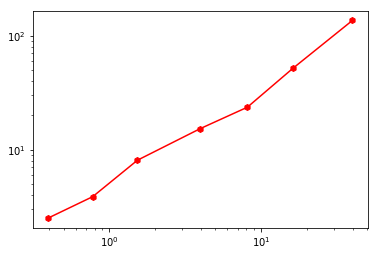

In [22]:
plt.loglog(data_5[0],data_5[1],color='r',marker="h")
plt.show()

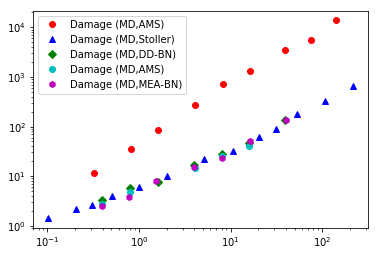

In [23]:
plt.loglog(data_1[:,0],data_1[:,1],color='r',marker="o",linestyle='None',label='Damage (MD,AMS)')
plt.loglog(data_2[:,0],data_2[:,1],color='b',marker="^",linestyle='None',label='Damage (MD,Stoller)')
plt.loglog(data_3[:,0],data_3[:,1],color='g',marker="D",linestyle='None',label='Damage (MD,DD-BN)')
plt.loglog(data_4[:,0],data_4[:,1],color='c',marker="o",linestyle='None',label='Damage (MD,AMS)')
plt.loglog(data_5[0],data_5[1],color='m',marker="h",linestyle='None',label='Damage (MD,MEA-BN)')
plt.legend()
plt.show()

## Fe threshold displacement energy

**athermal recombination corrected displaement per atom**

In [24]:
# Basic constant of Fe
Ed = 40   # threshold energy(eV)
barcdpa = -0.568
carcdpa = 0.286
brpa = 1018
crpa = 0.95

In [25]:
def  arcdpamodel(Td,Ed):
    index_arcdpa = (1-carcdpa)/((2*Ed/0.8)**barcdpa)*Td**barcdpa+carcdpa
    if Td<Ed:
        Nd = 0
    elif Td<(2*Ed/0.8) and Td>Ed:
        Nd = 1
    else:
        Nd = 0.8*Td*index_arcdpa/(2*Ed)
    return Nd

In [26]:
arcdpamodel(400,Ed)

2.4435354407875236

In [50]:
def  rpamodel(Td,Ed):
    index1 = Td**crpa/(brpa**crpa+Td**crpa)
    index_rpa = (brpa**crpa/((2*Ed/0.8)**crpa)+1)*index1
    if Td<Ed:
        Nd = 0
    elif Td<(2*Ed/0.8) and Td>Ed:
        Nd = 1
    else:
        Nd = 0.8*Td*index_rpa/(2*Ed)
        #Nd = Td*index_rpa
    return Nd

In [51]:
rpamodel(400,Ed)

11.741313583119371

In [29]:
def  nrtmodel(Td,Ed):
    if Td<Ed:
        Nd = 0
    elif Td<(2*Ed/0.8) and Td>Ed:
        Nd = 1
    else:
        Nd = 0.8*Td/(2*Ed)
    return Nd

In [30]:
nrtmodel(400,Ed)

4.0

In [83]:
def  kpmodel(Td,Ed):
    if Td<Ed:
        Nd = 0
    elif Td<(2*Ed) and Td>Ed:
        Nd = 1
    else:
        Nd = Td/(2*Ed)
    return Nd

In [85]:
kpmodel(400,Ed)

5.0

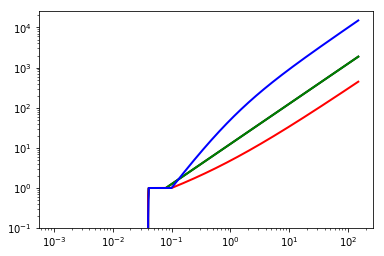

In [89]:
energy,kpdata,nrtdata,arcdata,rpadata =[], [],[],[],[]
for i in range(1,150000):
#for i in np.linspace(0.001,100,1000):
    energy.append(i*1e-3)
    kpdata.append(kpmodel(i,Ed))
    nrtdata.append(nrtmodel(i,Ed))
    arcdata.append(arcdpamodel(i,Ed))
    rpadata.append(rpamodel(i,Ed))

plt.loglog(energy,kpdata,color='k',linewidth=2)  
plt.loglog(energy,nrtdata,color='green',linewidth=2)
plt.loglog(energy,arcdata,color='red',linewidth=2)
plt.loglog(energy,rpadata,color='blue',linewidth=2)
plt.show()
        

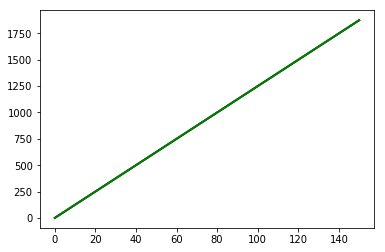

In [91]:
plt.plot(energy,kpdata,color='k',linewidth=2)  
plt.plot(energy,nrtdata,color='green',linewidth=2)
plt.show()

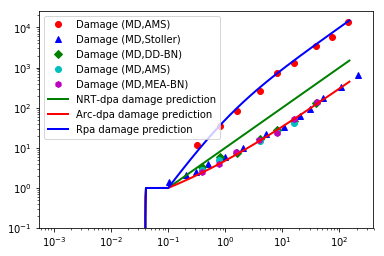

In [63]:
plt.figure()
plt.loglog(data_1[:,0],data_1[:,1],color='r',marker="o",linestyle='None',label='Damage (MD,AMS)')
plt.loglog(data_2[:,0],data_2[:,1],color='b',marker="^",linestyle='None',label='Damage (MD,Stoller)')
plt.loglog(data_3[:,0],data_3[:,1],color='g',marker="D",linestyle='None',label='Damage (MD,DD-BN)')
plt.loglog(data_4[:,0],data_4[:,1],color='c',marker="o",linestyle='None',label='Damage (MD,AMS)')
plt.loglog(data_5[0],data_5[1],color='m',marker="h",linestyle='None',label='Damage (MD,MEA-BN)')
plt.loglog(energy,nrtdata,color='green',linewidth=2,label='NRT-dpa damage prediction')
plt.loglog(energy,arcdata,color='red',linewidth=2,label='Arc-dpa damage prediction')
plt.loglog(energy,rpadata,color='blue',linewidth=2,label='Rpa damage prediction')
plt.legend()
plt.savefig('model.jpg')
plt.show()

In [62]:
plt.savefig('model.jpg')

<Figure size 432x288 with 0 Axes>

## Dpa cross section and PKA cross section

In [115]:
# Basic Physics constant
u    = 1.67*1e-27         # Atomic mass unit [kg]
me   = 9.10938291*1e-31   # Electron mass[kg]
mc = 1.99*1e-26           # Carbon atom
hbar = 6.626*10e-34/(2*np.pi) 
e0   = 1.6*1e-19          # Electron charge [C]
eV   = 1.6*1e-19          # Convert eV to Joul unit [J]
keV  = 1.6*1e-16          # Convert keV to Joul unit [J]
MeV  = 1.6*1e-13          # Convert MeV to Joul unit [j]
Na   = 6.02*1e23          # Avogardo's constant [#/mol]
a0   = 0.529*1e-10        # Bohr Radius
c    = 2.99792458*1e8     # Speed of light [m/s]
Ai   = 1e-10              # length unit [m]
ke   = 8.987551*1e9       # 1/4/pi/electric_constant[N*m^2/C^2] 


In [116]:
me*c*c/keV

511.6940665911976

In [118]:
# relative velocity of electron
def vector(E1,Ee0,c):
    p2 = (Ee0/(E1+Ee0))**2
    v = np.sqrt((1-p2)*c*c)
    return v
#  Basic interaction process of electro with atom
Eei = 20*keV                # electron kinetic energy
Za =  8                   # atomic number of target atom
Ma =  15.99                   # mass number of target atom
Em0 = Ma*mc*c*c/(12*keV)            # static energy of target atom
Ee0 = me*c*c/keV            # static energy of electron
Ed  = 0.025                   # threshold displacement energy [eV]
alpha = Za/137


In [119]:
# Cross section of PKA
def sigmaPKA(T1,Ed,alpha,beta):
    T2 = T1/Ed
    T3 = 2*(np.sqrt(T2)-1)-np.log(T2)
    C1 = 0.3136*(Za**2)*(1-beta**2)/(beta**4)
    sigmaE = np.pi*C1*(T2-1-(beta**2)*np.log(T2)+np.pi*alpha*beta*T3)/4
    return sigmaE

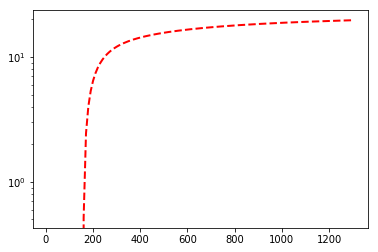

In [120]:
energy,transfer = [],[]
for i in range(1,131):
    Ee = 10*i
    v = vector(Ee,Ee0,c)
    beta = v/c              # ration of electron velocity to light velocity
    gamma2 = 1/(1-beta*beta)
    energy.append(Ee)
    Tm = 2*Ee*(Ee+2*Ee0)/Em0
    sigmaE = sigmaPKA(Tm,Ed,alpha,beta)
    transfer.append(sigmaE)
plt.semilogy(energy,transfer,linewidth='2',linestyle='--',color='r')
plt.show()

## Plot Dpa and PKA cross sections with MCCM algorithms

In [76]:
with open('datas/photon.txt') as filedata:
    line1 = filedata.readline().split(" ")
    print(line1)
#     for line in filedata:
#         print(line)
    
        

['', '', '', '50.00000', '', '', '', '', '', '-121.4530', '', '', '', '', '', '0.0000000E+00\n']


In [79]:
data_df = pd.read_csv("datas/photon.txt",header=None)

In [80]:
data_df.head()

,0
0,50.00000 -121.4530 0.0000000E+00
1,100.0000 164.8587 164.8587
2,150.0000 112.8339 0.0000000E+00
3,200.0000 71.34660 0.0000000E+00
4,250.0000 45.14634 0.0000000E+00


In [81]:
data_df.shape

(120, 1)

## Gamma-ray energy transformation with electron

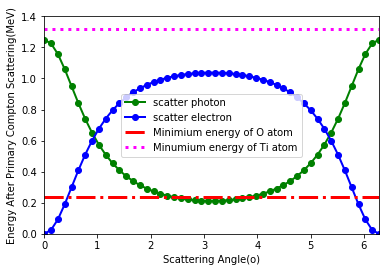

In [137]:
E_Co = 1.25   #MeV
theta,Egamma,Electron = [],[],[]
for i in np.linspace(0,2*np.pi,50):
    theta.append(i)
    Eg = E_Co/(1+E_Co*(1-np.cos(i))/0.511)
    Egamma.append(Eg)
    Electron.append(E_Co-Eg)
    
plt.plot(theta,Egamma,linewidth=2,color='green',marker='o',label='scatter photon')
plt.plot(theta,Electron,linewidth=2,color='blue',marker='o',label='scatter electron')
plt.plot([theta[0],theta[-1]],[0.236,0.236],linewidth=3,linestyle='-.',color='red',label='Minimium energy of O atom')
plt.plot([theta[0],theta[-1]],[1.316,1.316],linewidth=3,linestyle=':',color='magenta',label='Minumium energy of Ti atom')
plt.xlabel('Scattering Angle(o)')
plt.ylabel('Energy After Primary Compton Scattering(MeV)')
plt.axis([0,2*np.pi,0,1.4])
plt.legend()
plt.savefig('photon.jpg')
plt.show()

In [121]:
Ee0

511.6940665911976

In [122]:
Em0

14895041.491105944

In [124]:
from sympy import *
Ee = symbols('Ee')
solve(Ee*(Ee+2*Ee0*1e-3)/(Em0*1e-3)-20*1e-6,Ee)

[-1.25984622197589, 0.236458088793491]

In [125]:
Em01 = 47.87*mc*c*c/(12*keV)
Ee = symbols('Ee')
solve(Ee*(Ee+2*Ee0*1e-3)/(Em01*1e-3)-69*1e-6,Ee)

[-2.33889873564462, 1.31551060246222]